In [77]:
import pandas as pd
import numpy as np 
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"
page = requests.get(url)

In [79]:
soup = BeautifulSoup(page.text, 'html.parser')
table = soup.find_all('table')[0]
table


<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansa

In [80]:
table_indexing = table.find_all('th')
table_indexing

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [81]:
table_indexing_titles  = [title.text.strip() for title in table_indexing ]
table_indexing_titles

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [82]:
df = pd.DataFrame(columns=table_indexing_titles)
df


,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [83]:
column_row = table.find_all('tr')
for row in column_row[1:]:
     row_data = row.find_all('td')
     data_content= [data.text.strip() for data in row_data]
     #print(data_content)
     length= len(df)
     df.loc[length] = data_content
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


In [84]:
#df.info()
df[['Employees','Revenue (USD millions)']]=df[['Employees','Revenue (USD millions)']].replace(',','',regex=True)
df[['Employees','Revenue (USD millions)']]=df[['Employees','Revenue (USD millions)']].astype(float)
df['Revenue growth'] = df['Revenue growth'].str.replace('%', '', regex=False).astype(float)
df.info()
#df[['Revenue (USD millions)','Employees','Revenue growth']].astype(float)

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    object 
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    float64
 4   Revenue growth          100 non-null    float64
 5   Employees               100 non-null    float64
 6   Headquarters            100 non-null    object 
dtypes: float64(3), object(4)
memory usage: 6.2+ KB


In [85]:
df.describe().round(1)

,Revenue (USD millions),Revenue growth,Employees
count,100.0,100.0,100.0
mean,122346.1,6.1,162677.9
std,107882.0,21.0,266902.4
min,43452.0,-41.7,4137.0
25%,54608.5,-6.2,45000.0
50%,80296.0,6.0,86500.0
75%,149927.2,13.0,189162.5
max,648125.0,125.9,2100000.0


In [86]:
df.columns


Index(['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth',
       'Employees', 'Headquarters'],
      dtype='object')

C:\Users\haith\AppData\Local\Temp\ipykernel_34624\4152256993.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Revenue (USD millions)', y='Name', palette='Blues_d')


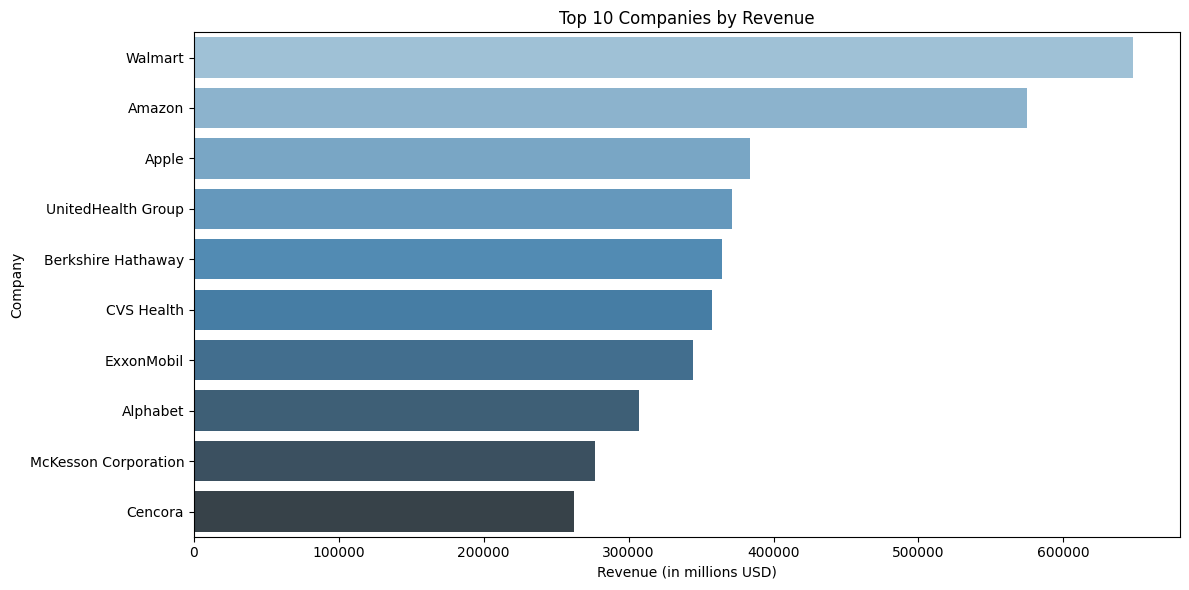

In [87]:
top10 = df.sort_values('Revenue (USD millions)', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='Revenue (USD millions)', y='Name', palette='Blues_d')
plt.title('Top 10 Companies by Revenue')
plt.xlabel('Revenue (in millions USD)')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

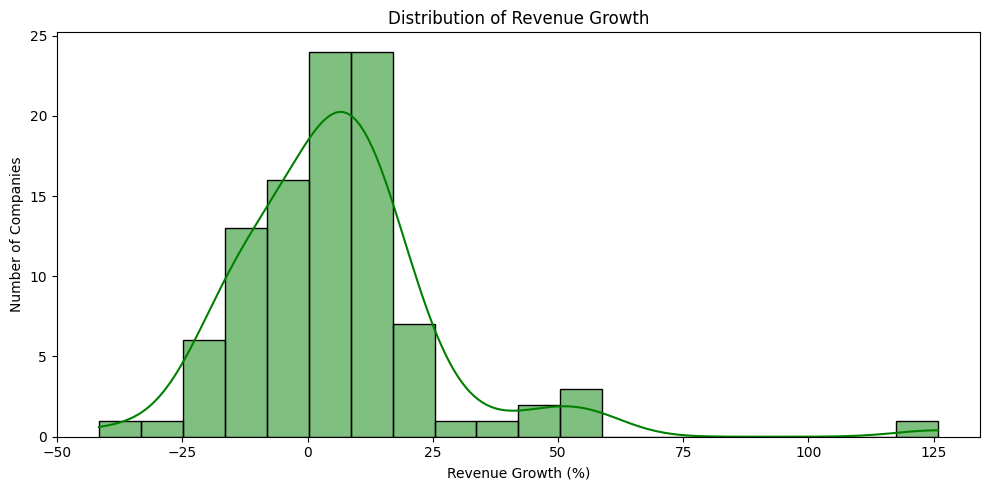

In [88]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Revenue growth'], bins=20, kde=True, color='green')
plt.title('Distribution of Revenue Growth')
plt.xlabel('Revenue Growth (%)')
plt.ylabel('Number of Companies')
plt.tight_layout()
plt.show()

C:\Users\haith\AppData\Local\Temp\ipykernel_34624\2010161663.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_employees, x='Employees', y='Name', palette='Oranges_d')


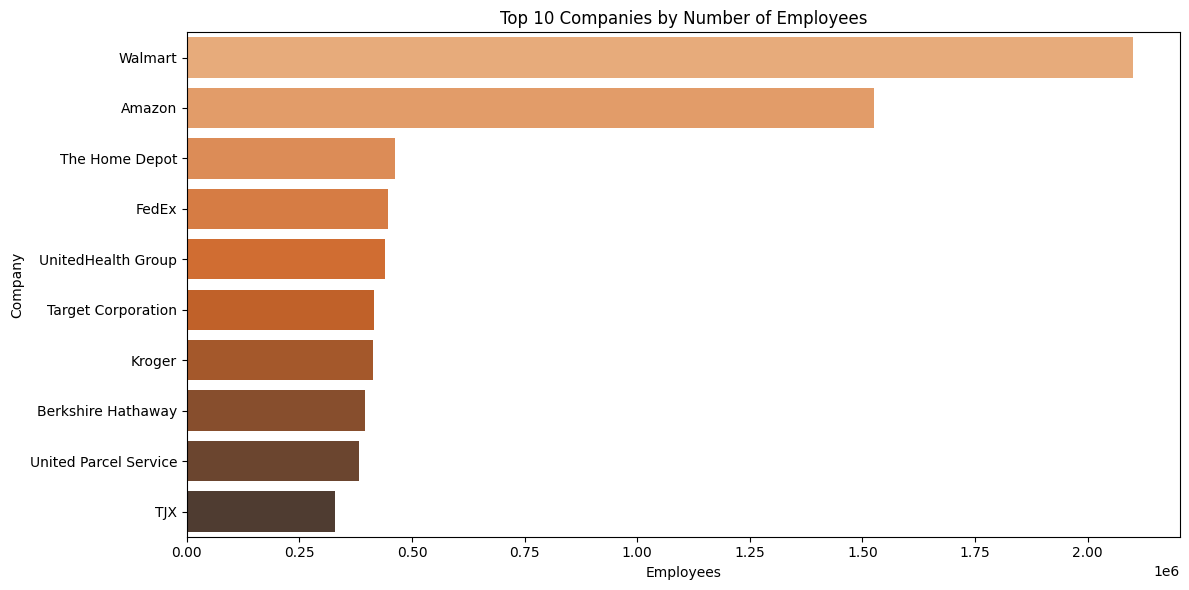

In [89]:
top10_employees = df.sort_values('Employees', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top10_employees, x='Employees', y='Name', palette='Oranges_d')
plt.title('Top 10 Companies by Number of Employees')
plt.xlabel('Employees')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

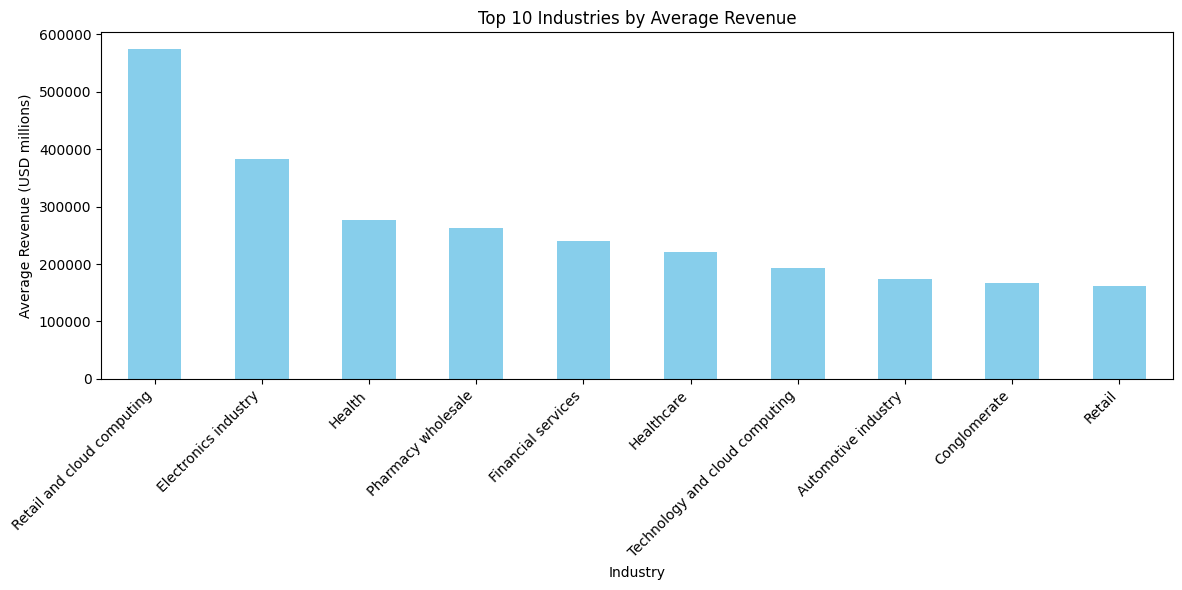

In [90]:
industry_revenue = df.groupby('Industry')['Revenue (USD millions)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
industry_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 10 Industries by Average Revenue')
plt.xlabel('Industry')
plt.ylabel('Average Revenue (USD millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\haith\AppData\Local\Temp\ipykernel_34624\722595416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hq_counts.values, y=hq_counts.index, palette='coolwarm')


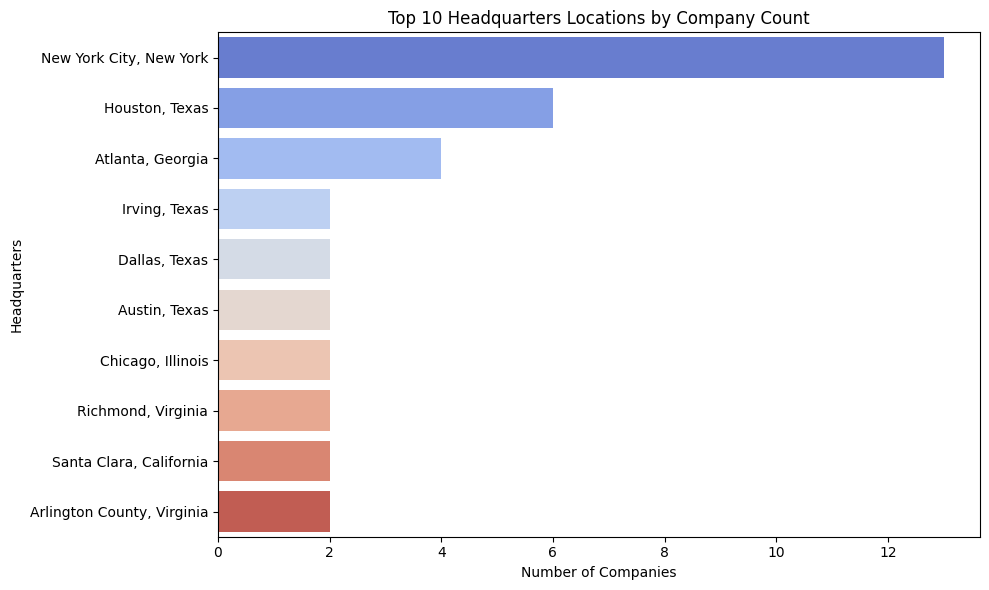

In [91]:
hq_counts = df['Headquarters'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=hq_counts.values, y=hq_counts.index, palette='coolwarm')
plt.title('Top 10 Headquarters Locations by Company Count')
plt.xlabel('Number of Companies')
plt.ylabel('Headquarters')
plt.tight_layout()
plt.show()